In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**read data**

In [99]:
data = pd.read_csv('euro2024_players.csv', index_col=False)
data.columns

Index(['Name', 'Position', 'Age', 'Club', 'Height', 'Foot', 'Caps', 'Goals',
       'MarketValue', 'Country'],
      dtype='object')

## **info**

**Most Goals**

In [98]:
most_goal = data.loc[data["Goals"] == data["Goals"].max()] 
most_goal

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
596,Cristiano Ronaldo,Centre-Forward,39,Al-Nassr FC,188,right,206,128,15000000,Portugal


**youngest**

In [93]:
youngest = data.loc[data["Age"] == data["Age"].min()]
youngest

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
126,Lamine Yamal,Right Winger,16,FC Barcelona,178,left,6,2,90000000,Spain


**oldest**

In [95]:
oldest = data.loc[data["Age"] == data["Age"].max()]
oldest

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
577,Pepe,Centre-Back,41,FC Porto,187,right,136,8,500000,Portugal


**shortest**

In [96]:
shortest = data.loc[data["Height"] == data["Height"].min()] 
shortest

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
69,Callum Styles,Central Midfield,24,Barnsley FC,167,left,21,0,2500000,Hungary


**tallest**

In [97]:
tallest = data.loc[data["Height"] == data["Height"].max()]
tallest

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
288,Vanja Milinković-Savić,Goalkeeper,27,Torino FC,202,right,19,0,5000000,Serbia


**players that never play in euro before**

In [91]:
never = pd.DataFrame(data.loc[data["Caps"] == 0])
never

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
38,Ross McCrorie,Right-Back,26,Bristol City,187,right,0,0,1800000,Scotland
51,Tommy Conway,Centre-Forward,21,Bristol City,185,right,0,0,4000000,Scotland
200,Michael Folorunsho,Central Midfield,26,Hellas Verona,190,right,0,0,8500000,Italy
260,Mads Hermansen,Goalkeeper,23,Leicester City,187,right,0,0,9000000,Denmark
442,Henrich Ravas,Goalkeeper,26,New England Revolution,195,right,0,0,1500000,Slovakia
523,Ahmetcan Kaplan,Centre-Back,21,Ajax Amsterdam,189,left,0,0,10000000,Turkiye
552,Giorgi Gvelesiani,Centre-Back,33,Persepolis FC,193,right,0,0,400000,Georgia
598,Vitezslav Jaros,Goalkeeper,22,SK Sturm Graz,190,right,0,0,5000000,Czech Republic
610,Lukas Cerv,Central Midfield,23,FC Viktoria Plzen,182,-,0,0,1500000,Czech Republic


## **dominant Foot**

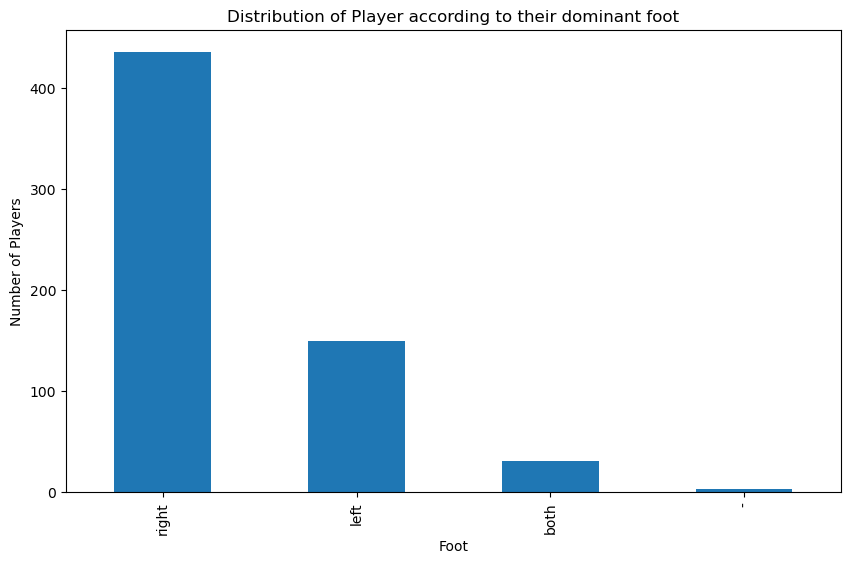

In [100]:
foot = data['Foot'].value_counts()
plt.figure(figsize=(10, 6))
foot.plot(kind='bar')
plt.title('Distribution of Player according to their dominant foot')
plt.xlabel('Foot')
plt.ylabel('Number of Players')
plt.show()

## **market value**

### **Person**

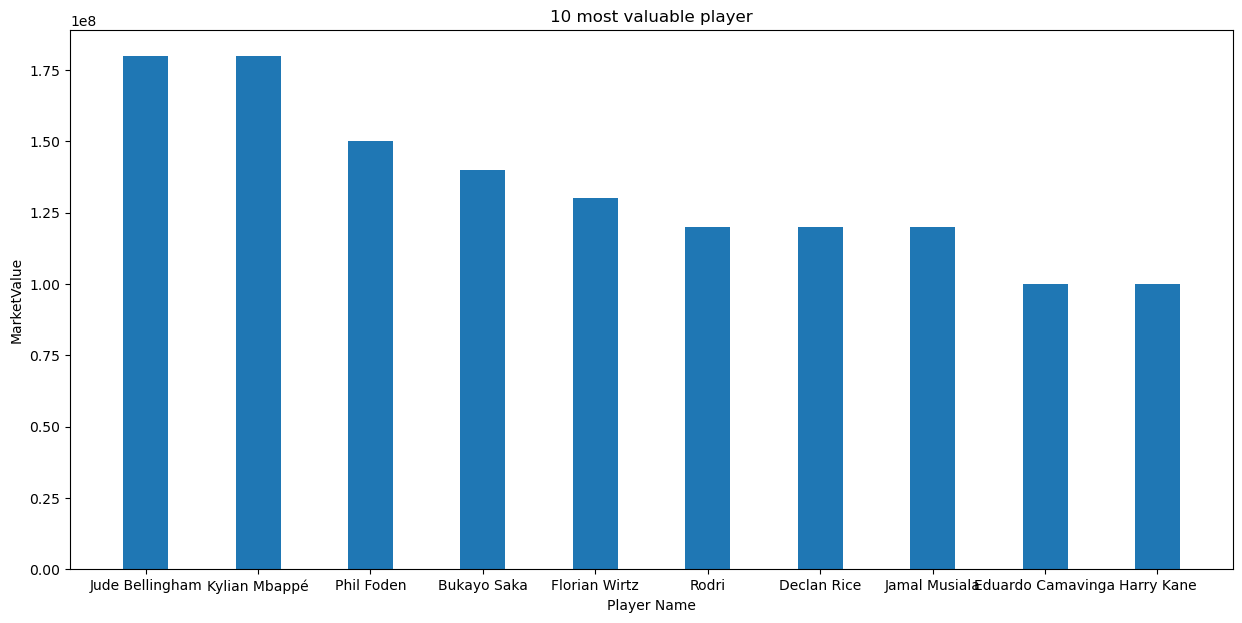

In [166]:
df_grouped = data[["Name","MarketValue"]].sort_values("MarketValue", ascending=False)[:10]
plt.figure(figsize =(15, 7))
plt.bar(df_grouped["Name"],df_grouped["MarketValue"],width = 0.4)
plt.xlabel("Player Name")
plt.ylabel("MarketValue")
plt.title("10 most valuable player")
plt.show()

### **Country**

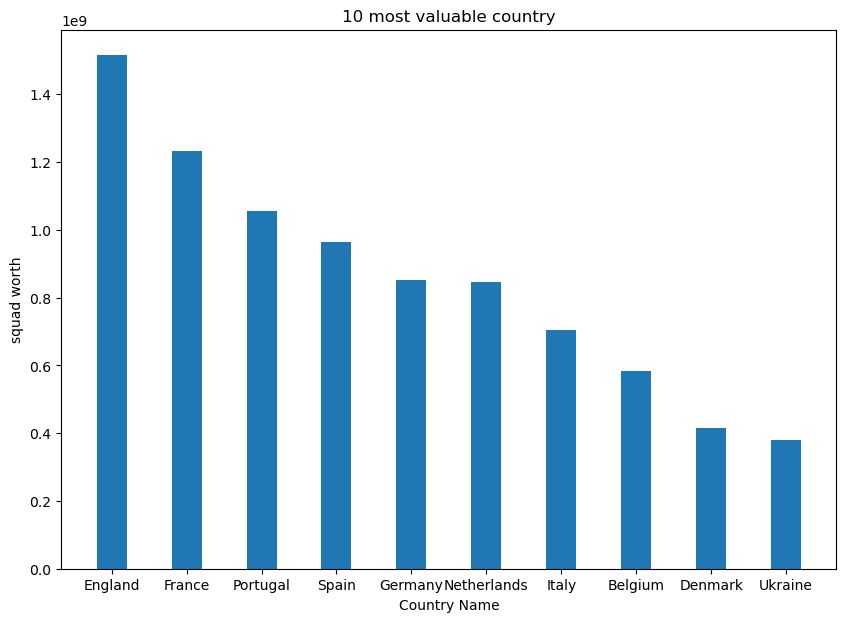

In [167]:
df_grouped = data[["Country","MarketValue"]].groupby('Country').sum().reset_index()
x = df_grouped.sort_values("MarketValue", ascending=False)[:10]

plt.figure(figsize =(10, 7))
plt.bar(x["Country"],x["MarketValue"],width = 0.4)
plt.xlabel("Country Name")
plt.ylabel("squad worth")
plt.title("10 most valuable country")
plt.show()

### **Club**

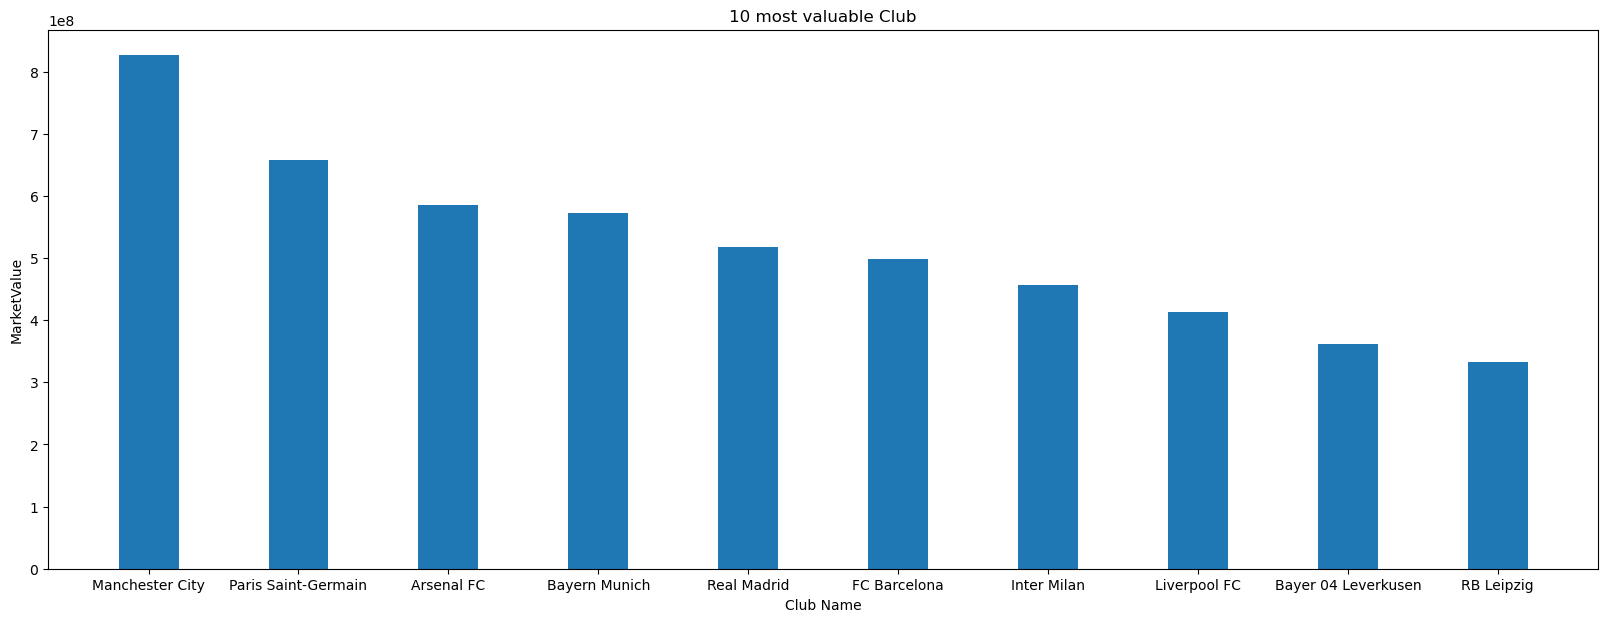

In [169]:
df_grouped = data[["Club","MarketValue"]].groupby('Club').sum().reset_index()
x = df_grouped.sort_values("MarketValue", ascending=False)[:10]

plt.figure(figsize =(20, 7))
plt.bar(x["Club"],x["MarketValue"],width = 0.4)
plt.xlabel("Club Name")
plt.ylabel("MarketValue")
plt.title("10 most valuable Club")
plt.show()

## **age**

In [181]:
# df_grouped = data[["Country","age"]].sort_values("MarketValue", ascending=False)[:10]
df_grouped = data[["Country","Age"]].groupby('Country').mean().reset_index()
x = df_grouped.sort_values("Age")
x

,Country,Age
4,Czech Republic,25.307692
22,Turkiye,25.807692
6,England,26.076923
23,Ukraine,26.346154
11,Italy,26.500000
12,Netherlands,26.538462
1,Austria,26.807692
2,Belgium,26.880000
7,France,26.880000
14,Portugal,26.961538


## **Height**

In [182]:
df_grouped = data[["Country","Height"]].groupby('Country').mean().reset_index()
x = df_grouped.sort_values("Height")
x

,Country,Height
20,Spain,181.769231
14,Portugal,182.384615
6,England,182.461538
16,Scotland,182.692308
10,Hungary,182.807692
1,Austria,183.192308
0,Albania,183.615385
15,Romania,183.846154
21,Switzerland,183.923077
22,Turkiye,183.923077
